In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ranaa\Downloads\drive\train.csv",encoding = "ISO=8859-1")


In [3]:
df.shape

(74111, 29)

In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
X_raw = df.iloc[:,2:]
y = df["log_price"]

In [6]:
from sklearn.model_selection import train_test_split
import missingno as msno
from datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
pd.set_option("display.max_columns", None)
X_raw.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


<Axes: >

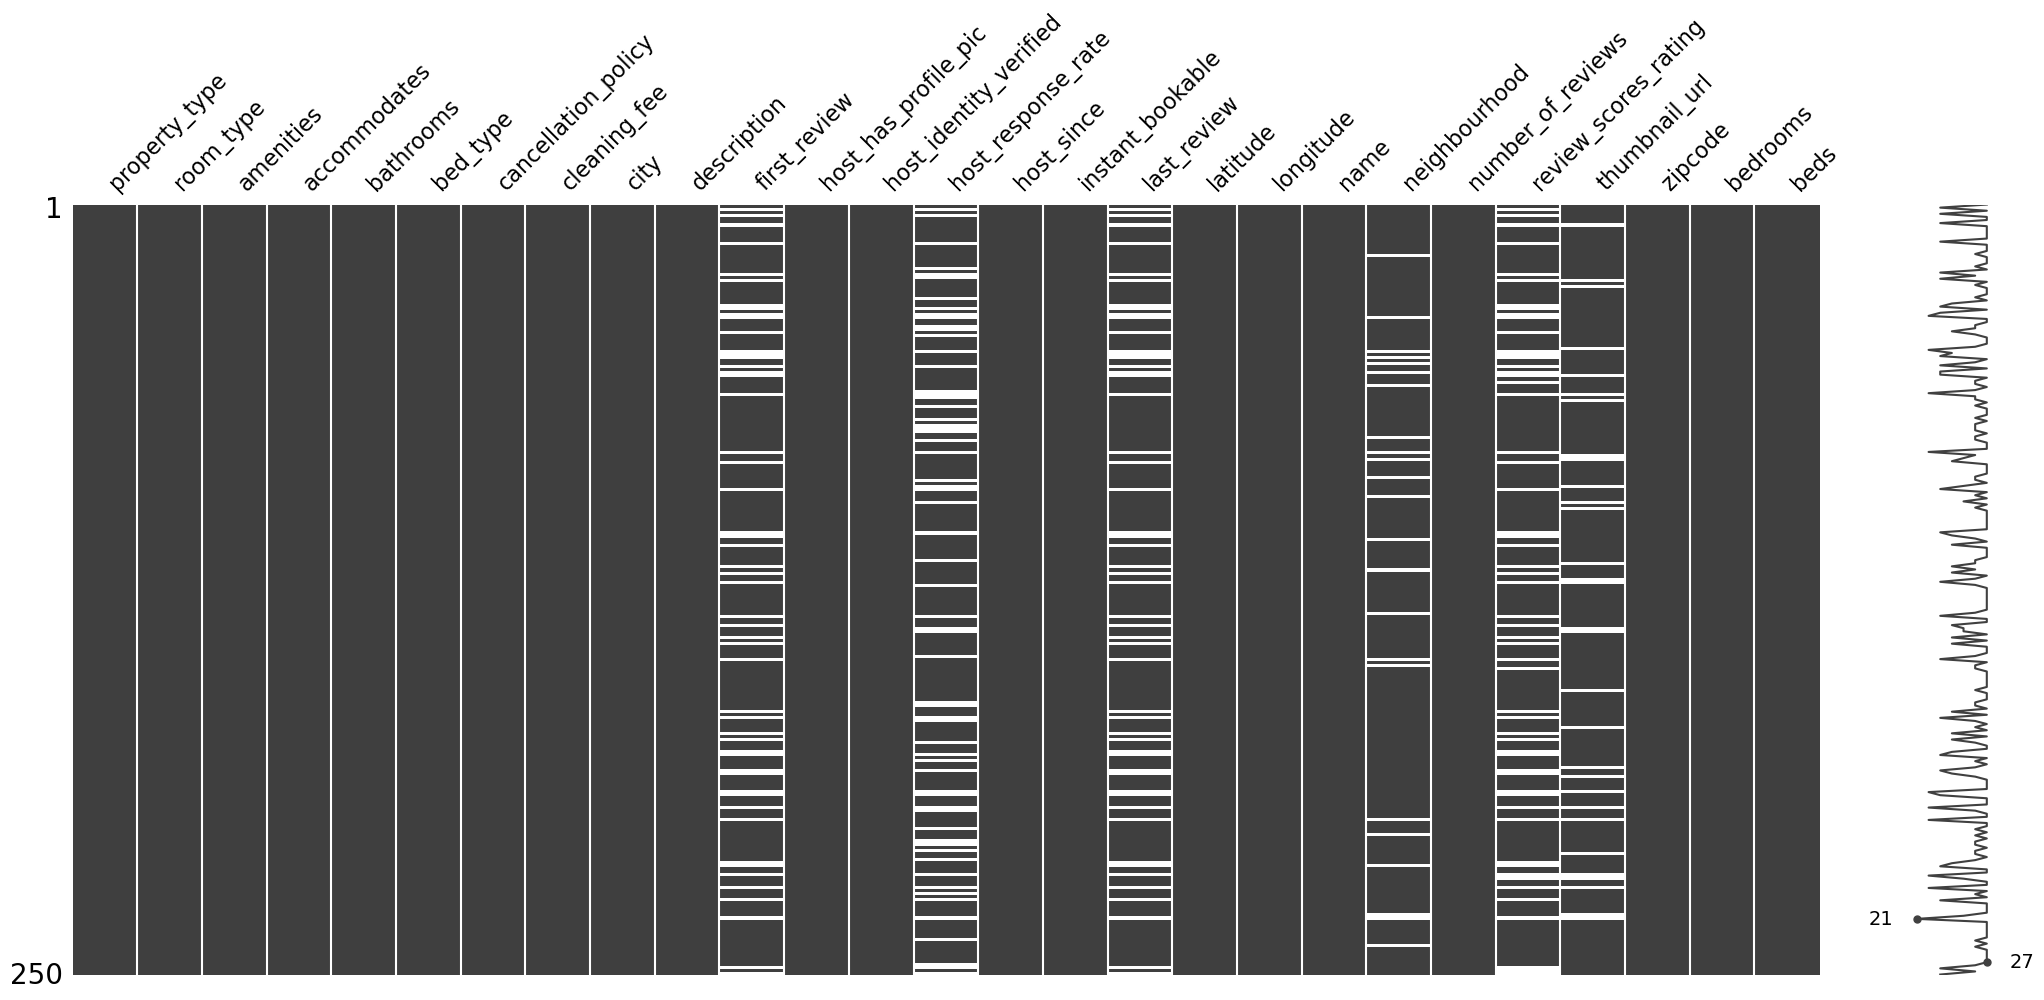

In [8]:
msno.matrix(X_raw.sample(250))


In [9]:
X = X_raw.drop(columns=["thumbnail_url", "description", "name", "zipcode"])
X[["first_review_NA", "host_response_rate_NA", "last_review_NA", "review_scores_rating_NA"]] = X_raw[["first_review", "host_response_rate", "last_review", "review_scores_rating"]].fillna("NA").apply(lambda col: col.apply(lambda x: 1 if x=="NA" else 0))
X[["first_review", "last_review", "review_scores_rating"]] = X_raw[["first_review", "last_review", "review_scores_rating"]].fillna(0)
X.neighbourhood = X_raw.neighbourhood.fillna("NA")
X.host_response_rate = X_raw.host_response_rate.fillna("0%")
print(X.shape[0])
X.dropna(inplace=True)
y = y[X.index]
print(X.shape[0])

74111
73579


In [10]:
today = dt.today()
X.amenities = X.amenities.str.split(",").apply(len)
X[["first_review", "last_review", "host_since"]] = X[["first_review", "last_review", "host_since"]].apply(lambda col: col.apply(lambda x: (today-dt.fromisoformat(x)).days if x!=0 else x))
X.host_response_rate = X.host_response_rate.str.replace("%", "").astype(int)
X[["host_has_profile_pic", "host_identity_verified", "instant_bookable"]] = X[["host_has_profile_pic", "host_identity_verified", "instant_bookable"]].apply(lambda col: col.apply(lambda x: 1 if x == "t" else 0))
X.cleaning_fee = X.cleaning_fee.apply(lambda x: 1 if x==True else 0)

In [11]:
X.describe()

,amenities,accommodates,bathrooms,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,first_review_NA,host_response_rate_NA,last_review_NA,review_scores_rating_NA
count,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000,73579.000000
mean,17.635331,3.160888,1.236039,0.734884,2143.316789,0.996956,0.673263,71.252708,3269.792971,0.263023,1812.349325,38.441312,-92.441681,20.889425,72.865437,1.266802,1.712975,0.213920,0.244920,0.213498,0.225472
std,6.923991,2.156297,0.582947,0.441398,1199.820181,0.055092,0.469023,42.988835,659.296636,0.440278,965.908351,3.081897,21.711043,37.818332,39.913863,0.853585,1.256094,0.410074,0.430043,0.409779,0.417896
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2102.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,1.000000,0.000000,2155.000000,1.000000,0.000000,0.000000,2753.000000,0.000000,2108.000000,34.126898,-118.342867,1.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,2.000000,1.000000,1.000000,2485.000000,1.000000,1.000000,100.000000,3201.000000,0.000000,2175.000000,40.661481,-76.998494,6.000000,94.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,4.000000,1.000000,1.000000,2845.000000,1.000000,1.000000,100.000000,3724.000000,1.000000,2296.000000,40.746124,-73.954688,23.000000,99.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,86.000000,16.000000,8.000000,1.000000,5345.000000,1.000000,1.000000,100.000000,5604.000000,1.000000,5280.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
one_hot = pd.get_dummies(X[["property_type", "room_type", "bed_type", "cancellation_policy", "city", "neighbourhood"]], drop_first = True)
X.drop(columns = ["property_type", "room_type", "bed_type", "cancellation_policy", "city", "neighbourhood"], inplace = True)
X[one_hot.columns] = one_hot

print(X.shape)
X.head()

C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[one_hot.columns] = one_hot
C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\2295940294.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

(73579, 688)


,amenities,accommodates,bathrooms,cleaning_fee,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,first_review_NA,host_response_rate_NA,last_review_NA,review_scores_rating_NA,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,neighbourhood_Adams Morgan,neighbourhood_Alamo Square,neighbourhood_Albany Park,neighbourhood_Alhambra,neighbourhood_Allerton,neighbourhood_Allston-Brighton,neighbourhood_Alondra Park,neighbourhood_Alphabet City,neighbourhood_Altadena,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Andersonville,neighbourhood_Annadale,neighbourhood_Arboretum,neighbourhood_Arcadia,neighbourhood_Archer Heights,neighbourhood_Arleta,neighbourhood_Armour Square,neighbourhood_Arrochar,neighbourhood_Artesia,neighbourhood_Arts District,neighbourhood_Ashburn,neighbourhood_Astoria,neighbourhood_Atwater Village,neighbourhood_Auburn Gresham,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Azusa,neighbourhood_Back Bay,neighbourhood_Back of the Yards,neighbourhood_Balboa Terrace,neighbourhood_Baldwin Hills,neighbourhood_Baldwin Park,neighbourhood_Barney Circle,neighbourhood_Barry Farm,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayview,neighbourhood_Beacon Hill,neighbourhood_Bedford Park,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bel Air/Beverly Crest,neighbourhood_Bell,neighbourhood_Bellevue,neighbourhood_Bellflower,neighbourhood_Belmont,neighbourhood_Belmont Cragin,neighbourhood_Benning,neighbourhood_Benning Heights,neighbourhood_Benning Ridge,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Berkley,neighbourhood_Bernal Heights,"neighbourhood_Bethesda, MD",neighbourhood_Beverly,neighbourhood_Beverly Hills,neighbourhood_Bloomingdale,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Boyle Heights,neighbourhood_Boystown,neighbourhood_Bradbury,neighbourhood_Brentwood,neighbourhood_Bridgeport,neighbourhood_Brighton Beach,neighbourhood_Brighton Park,neighbourhood_Brightwood,neighbourhood_Bronxdale,neighbourhood_Bronzeville,neighbourhood_Brookland,neighbourhood_Brookline,neighbourhood_Brooklyn,neighbourhood_Brooklyn Heights,neighbourhood_Brooklyn Navy Yard,neighbourhood_Brownsville,neighbourhood_Bucktown,neighbourhood_Buena Vista,neighbourhood_Burbank,neighbourhood_Burleith,neighbourhood_Bushwick,neighbourhood_Cahuenga Pass,neighbourhood_Cambridge,neighbourhood_Canarsie,neighbourhood_Canoga Park,neighbourhood_Capitol Hill,neighbourhood_Carroll Gardens,neighbourhood_Carson,neighbourhood_Carver Langston,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Cathedral Heights,neighbourhood_Central Northeast/Mahaning Heights,neighbourhood_Cerritos,neighbourhood_Charlestown,neighbourhood_Chatham,neighbourhood_Chatsworth,neighbourhood_Chelsea,neighbou

C:\Users\ranaa\AppData\Local\Temp\ipykernel_17116\3915777804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pp["log_price"] = y


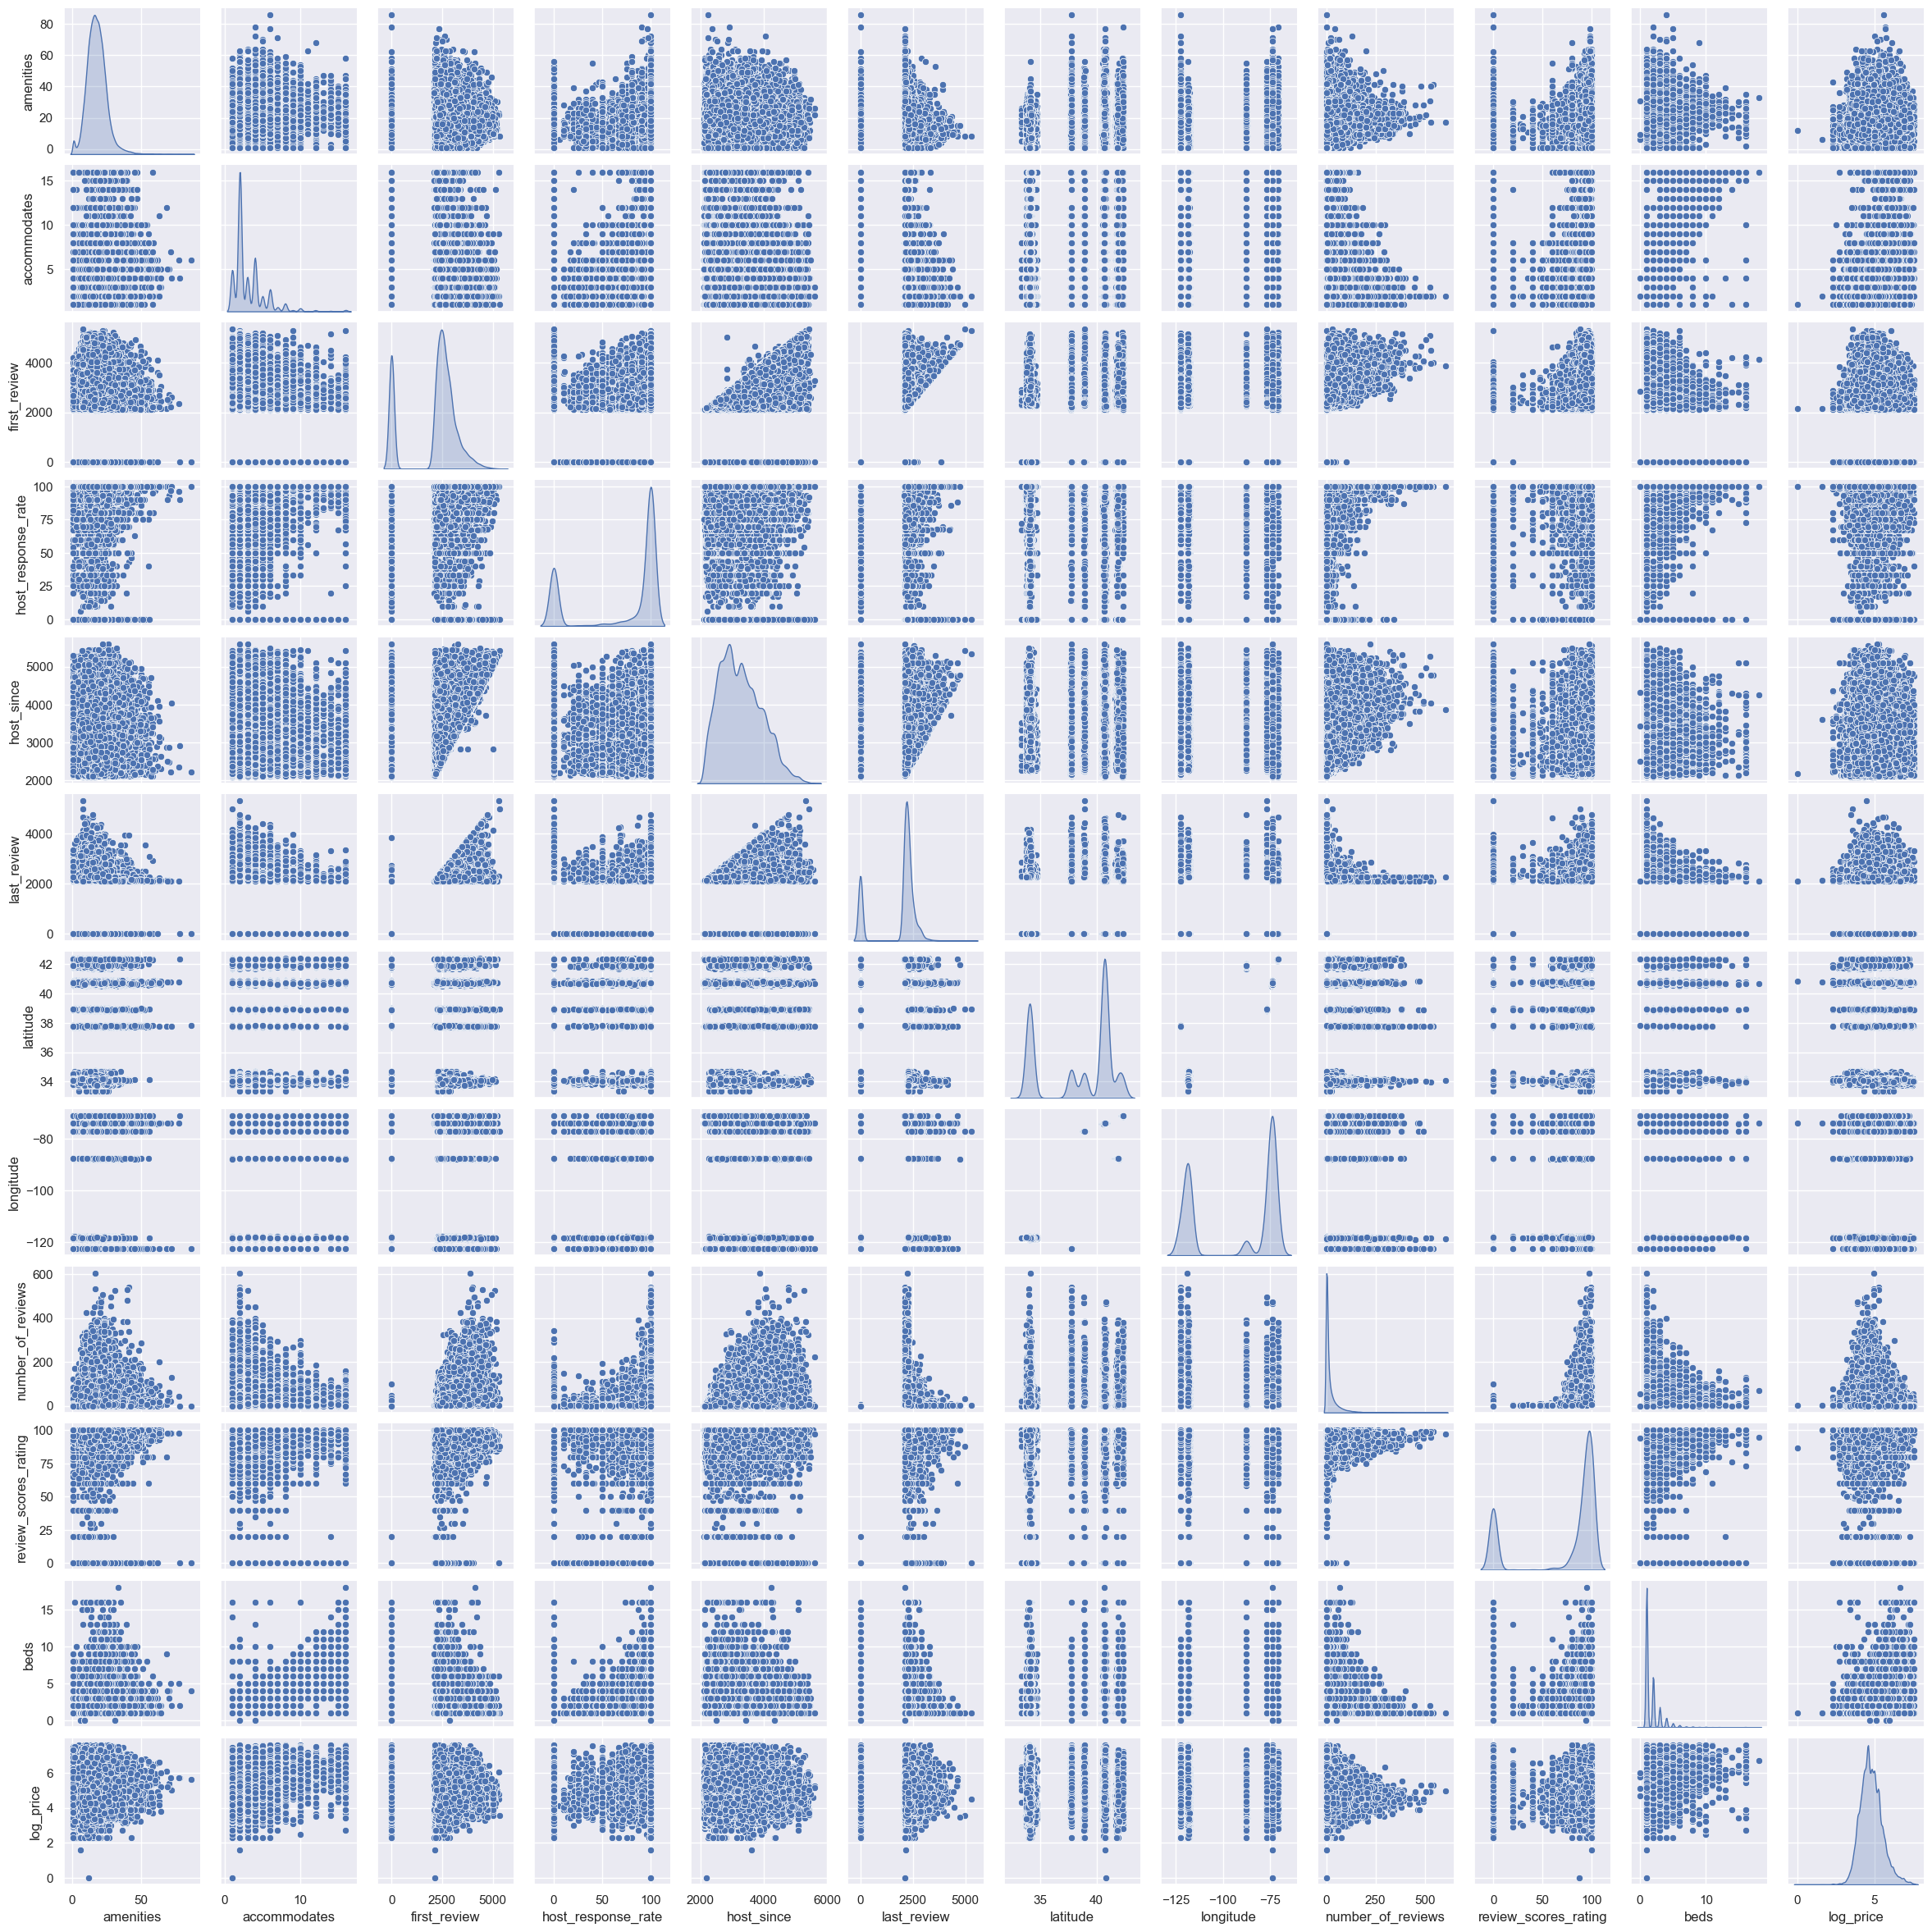

In [13]:
sns.set()
columns = ['amenities','accommodates','first_review','host_response_rate','host_since','last_review','latitude','longitude','number_of_reviews','review_scores_rating','beds']
df_pp = X[columns]
df_pp["log_price"] = y
sns.pairplot(df_pp,height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
y.mean()

4.782890064910701

In [16]:
import multiprocessing as mp
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [17]:
lrm = LR()
results = cross_validate(lrm, X_train, y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

R²: 0.6800847075976497
OSR²: 0.6687950671729015


In [18]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
relevant_columns = est2.pvalues.index[est2.pvalues <= 0.05].drop("const")
relevant_columns

Index(['amenities', 'accommodates', 'bathrooms', 'cleaning_fee',
       'first_review', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review',
       ...
       'neighbourhood_Westchester/Playa Del Rey',
       'neighbourhood_Western Addition/NOPA', 'neighbourhood_Westlake',
       'neighbourhood_Westside', 'neighbourhood_Westwood',
       'neighbourhood_Wicker Park', 'neighbourhood_Williamsburg',
       'neighbourhood_Willowbrook', 'neighbourhood_Woodley Park',
       'neighbourhood_Wrigleyville'],
      dtype='object', length=285)

In [19]:
num_columns_old = 1
num_columns_new = 0
while num_columns_old != num_columns_new:
    num_columns_old = len(relevant_columns)
    X_train_lr = X_train[relevant_columns]
    X2 = sm.add_constant(X_train_lr)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    relevant_columns = est2.pvalues.index[est2.pvalues <= 0.05].drop("const")
    num_columns_new = len(relevant_columns)

In [20]:
relevant_columns


Index(['amenities', 'accommodates', 'bathrooms', 'cleaning_fee',
       'first_review', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review',
       ...
       'neighbourhood_Westchester/Playa Del Rey',
       'neighbourhood_Western Addition/NOPA', 'neighbourhood_Westlake',
       'neighbourhood_Westside', 'neighbourhood_Westwood',
       'neighbourhood_Wicker Park', 'neighbourhood_Williamsburg',
       'neighbourhood_Willowbrook', 'neighbourhood_Woodley Park',
       'neighbourhood_Wrigleyville'],
      dtype='object', length=283)

In [21]:
results = cross_validate(lrm, X_train[relevant_columns], y_train, cv=5, return_train_score = True)
print("R²: " + str(results["train_score"].mean()))
print("OSR²: " + str(results["test_score"].mean()))

R²: 0.6757443637600721
OSR²: 0.6701318993595502


In [22]:
lrm.fit(X_train[relevant_columns], y_train)
lrm_score = lrm.score(X_test[relevant_columns], y_test)
lrm_score

0.6536776173442718

# Second model : Decision tree

In [23]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree
from tqdm import tqdm

In [24]:
train_scores = []
val_scores = []
cps = []
for cp in tqdm([0,0.00005,0.0001,0.0005,0.001]):
    cps.append(cp)
    dtr = DTR(ccp_alpha=cp)
    results = cross_validate(dtr, X_train[relevant_columns], y_train, cv=5, return_train_score = True)
    train_scores.append(results["train_score"].mean())
    val_scores.append(results["test_score"].mean())

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:43<00:00, 80.73s/it]


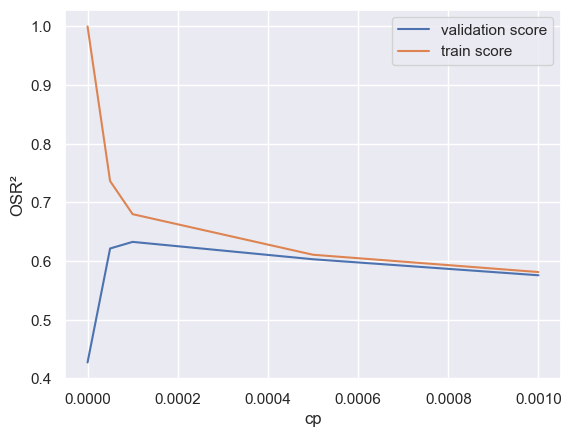

In [25]:
ax=plt.plot(cps, val_scores)
ax=plt.plot(cps, train_scores)
ax=plt.legend(["validation score", "train score"])
ax=plt.xlabel("cp")
ax=plt.ylabel("OSR²")

In [26]:
dtr = DTR(ccp_alpha=0.0001)
dtr.fit(X_train[relevant_columns], y_train)

DecisionTreeRegressor(ccp_alpha=0.0001)

In [27]:
ft_importance = pd.DataFrame({"feature": relevant_columns, "importance": dtr.feature_importances_}).sort_values("importance", ascending=False).query("importance > 0")
print(ft_importance.shape[0])
ft_importance.head(6)

32


,feature,importance
38,room_type_Private room,0.423014
14,bedrooms,0.173099
39,room_type_Shared room,0.093567
11,longitude,0.089760
2,bathrooms,0.070387
10,latitude,0.055307


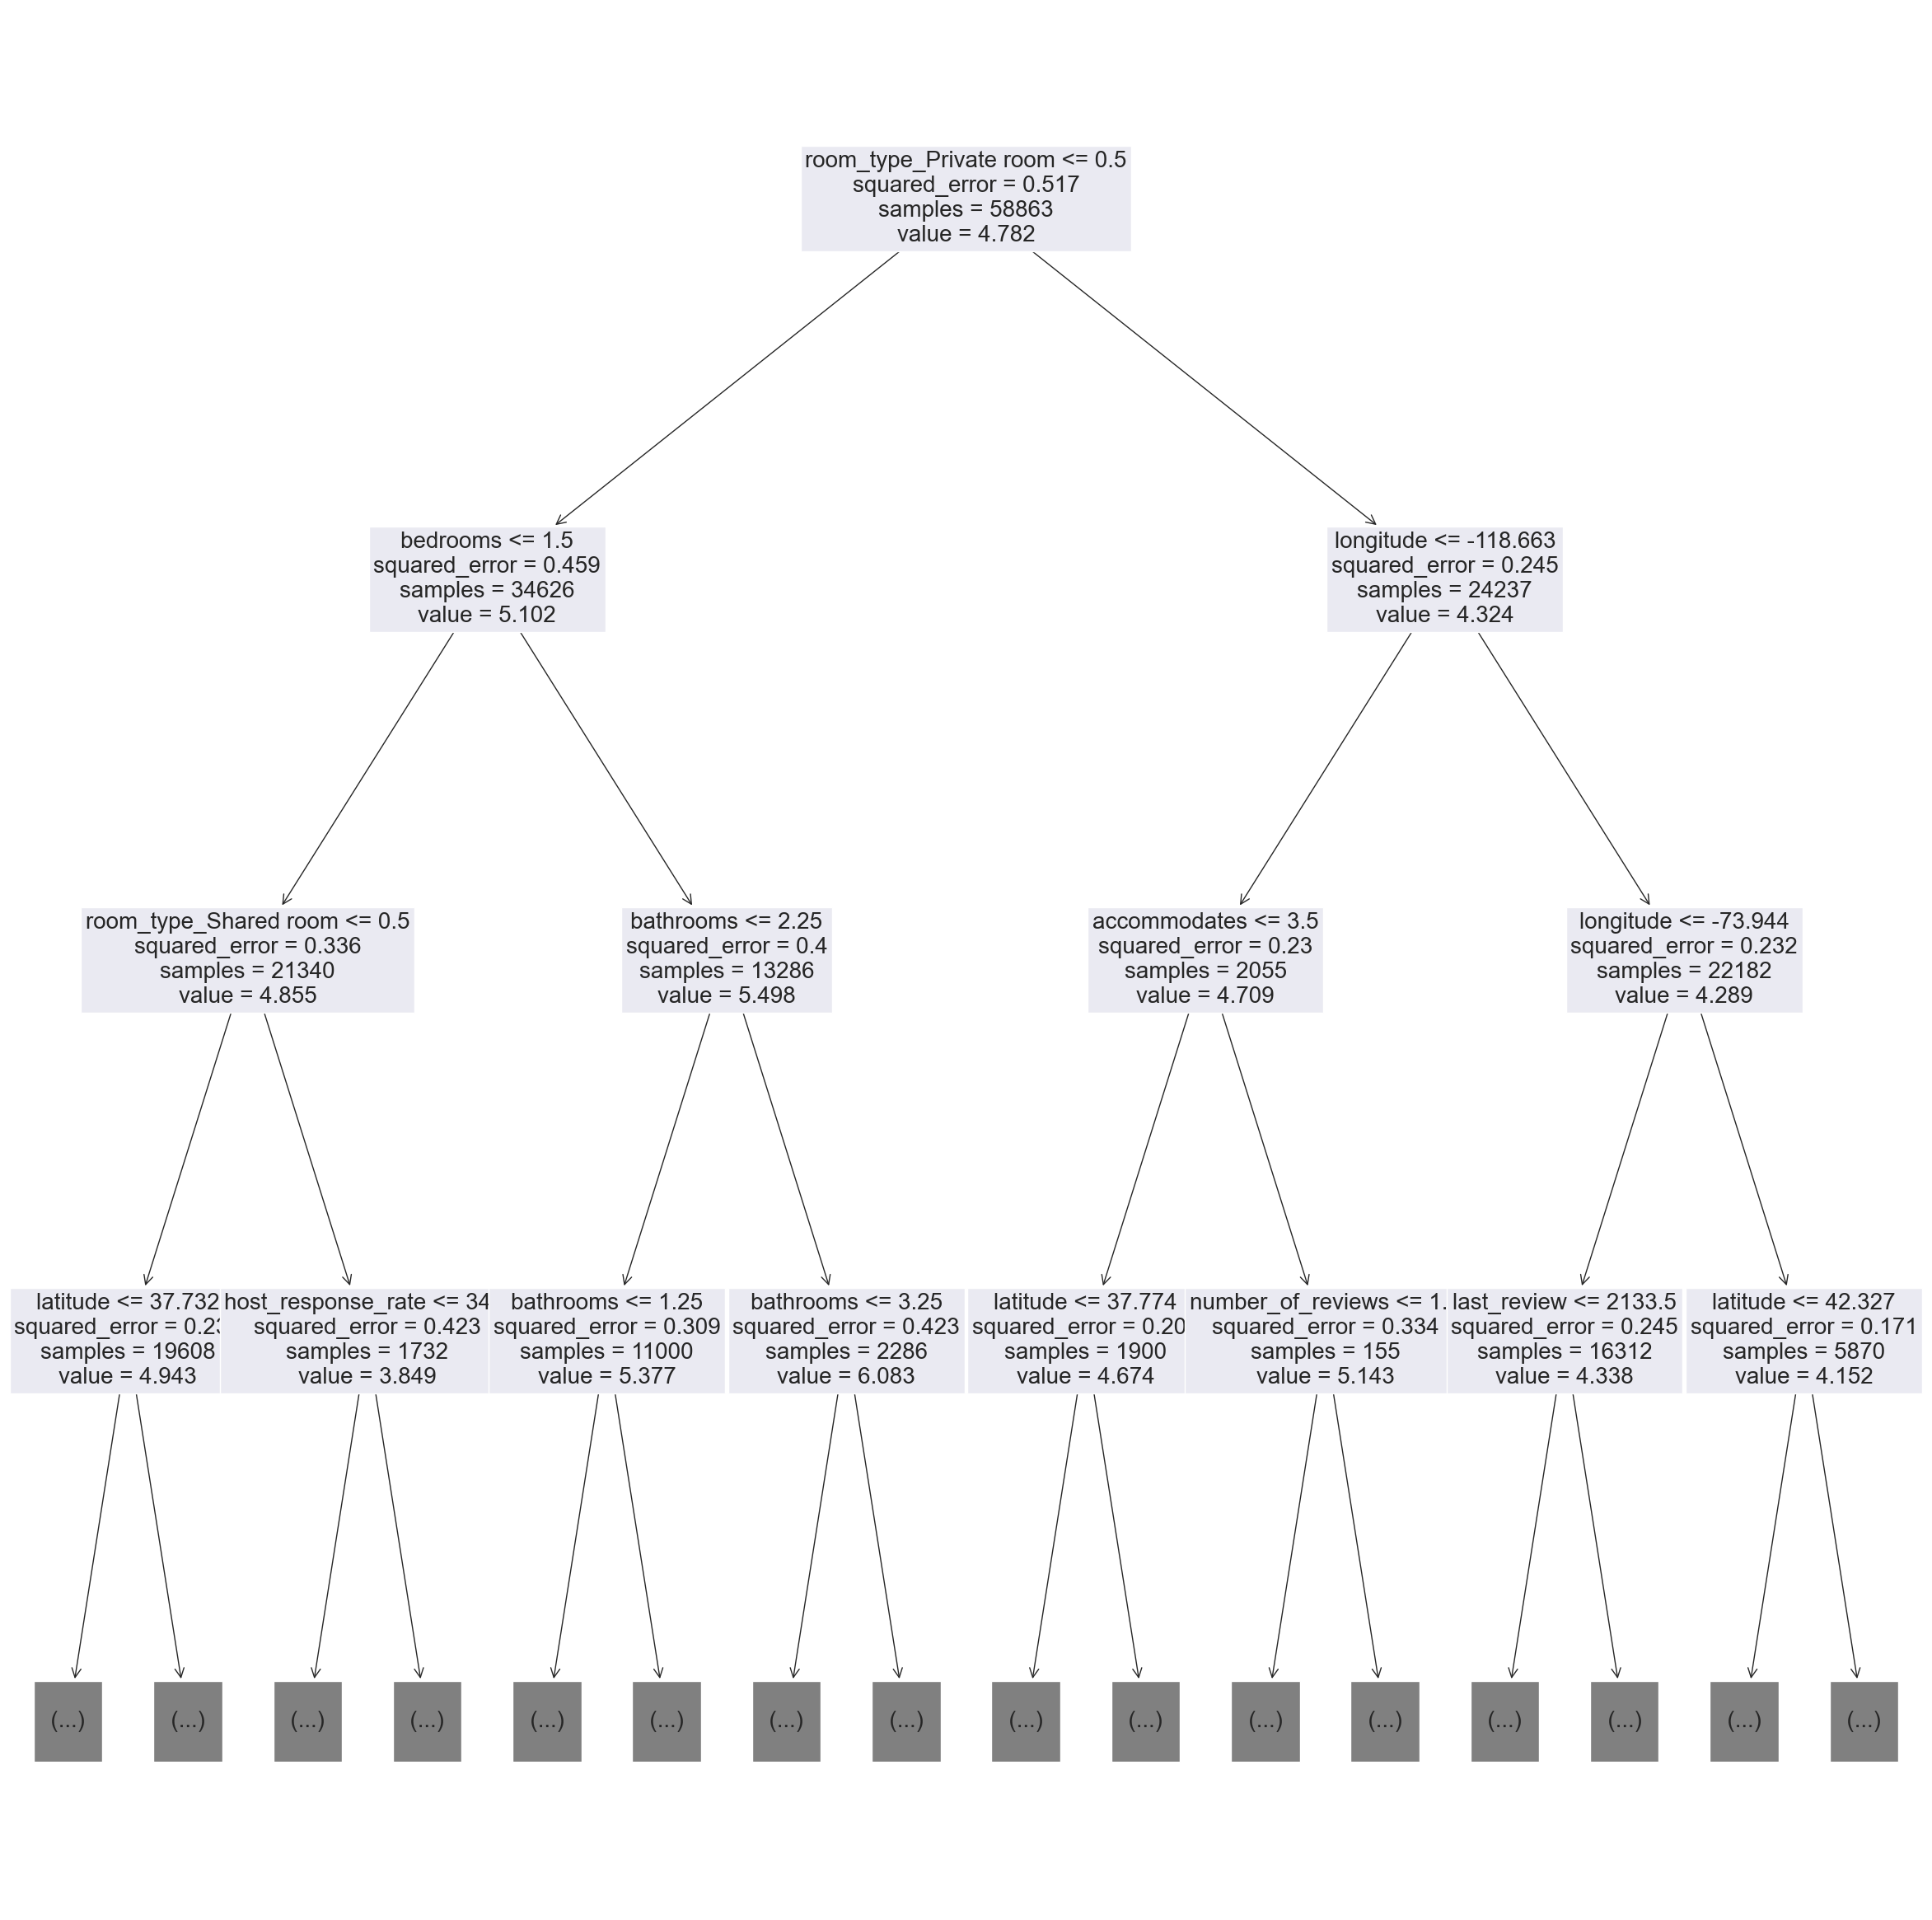

In [28]:
plt.figure(figsize=(30,30))
ax = plot_tree(dtr, feature_names = relevant_columns, fontsize=20, max_depth=3)

In [29]:
dtr_score = dtr.score(X_test[relevant_columns], y_test)
dtr_score

0.6186561679348599

# Third Model


In [30]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [31]:
params = []
oob_scores = []
for i in tqdm(range(5)):
    max_ft = 0.4 + i/20
    params.append(max_ft)
    rfr = RFR(oob_score = True, max_features = max_ft)
    rfr.fit(X_train[relevant_columns], y_train)
    oob_scores.append(rfr.oob_score_)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [10:24<00:00, 124.88s/it]


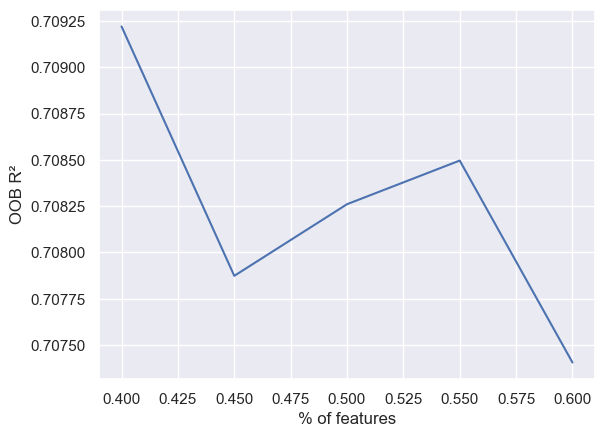

In [32]:
ax=plt.plot(params, oob_scores)
ax=plt.xlabel("% of features")
ax=plt.ylabel("OOB R²")

In [34]:
rfr = RFR(max_features = 0.5)
rfr.fit(X_train[relevant_columns], y_train)
ft_importance = pd.DataFrame({"feature": relevant_columns, "importance": rfr.feature_importances_}).sort_values("importance", ascending=False).query("importance > 0")
print(ft_importance.shape[0])
ft_importance.head(6)

282


,feature,importance
38,room_type_Private room,0.198618
14,bedrooms,0.137560
11,longitude,0.099393
10,latitude,0.082617
1,accommodates,0.082608
2,bathrooms,0.055821


In [35]:
rfr_score = rfr.score(X_test[relevant_columns], y_test)
rfr_score

0.6997493587539247

# Conclusion

In [36]:
print("Linear Regression: " + str(lrm_score))
print("Decision Tree: " + str(dtr_score))
print("Random Forest: " + str(rfr_score))

Linear Regression: 0.6536776173442718
Decision Tree: 0.6186561679348599
Random Forest: 0.6997493587539247
